
# 🔍 Analyse de corrélation sur les victimes de Harold Shipman

Ce notebook permet d'explorer les relations statistiques entre différentes variables du fichier `shipman-confirmed-victims.csv` à l'aide de Python.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Charger les données
df = pd.read_csv("shipman-confirmed-victims.csv")
df.head()


,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


In [26]:
# Charger les données du times-comparaison
df_time = pd.read_csv('shipman-times-comparison.csv')
df_time.head()


,Hour,Shipman,Comparison
0,0,2.6,1.1
1,1,1.0,3.0
2,2,2.6,3.1
3,3,3.0,3.8
4,4,0.3,4.0


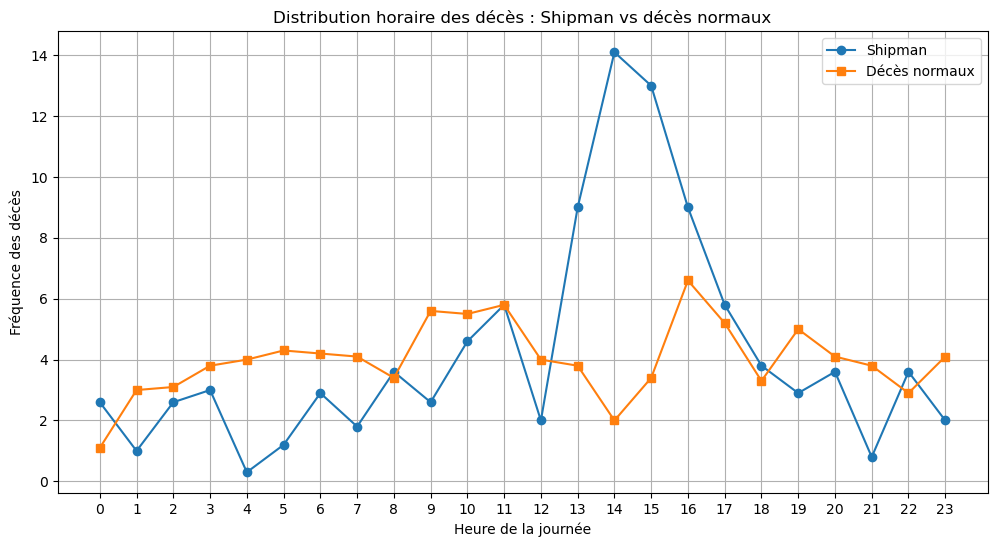

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df_time['Hour'], df_time['Shipman'], label='Shipman', marker='o')
plt.plot(df_time['Hour'], df_time['Comparison'], label='Décès normaux', marker='s')
plt.xlabel("Heure de la journée")
plt.ylabel("Fréquence des décès")
plt.title("Distribution horaire des décès : Shipman vs décès normaux")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [4]:

# Nettoyage des noms de colonnes
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.head()


,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


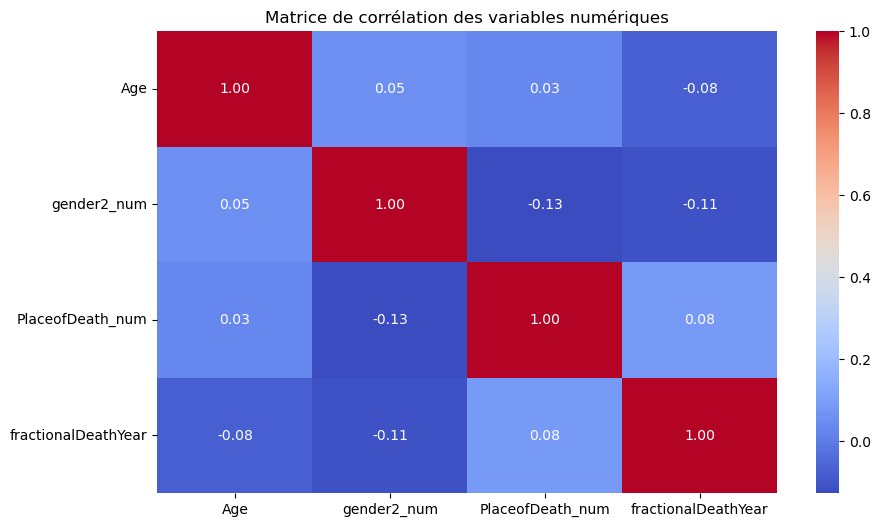

In [20]:
# Sélection des colonnes numériques
df['gender2_num'] = df['gender2'].map({'Women': 0, 'Men': 1})
df['PlaceofDeath_num'] = df['PlaceofDeath'].astype('category').cat.codes
num_cols = ['Age', 'gender2_num', 'PlaceofDeath_num', 'fractionalDeathYear']

# Calcul de la matrice de corrélation
corr_matrix = df[num_cols].corr()

# Affichage avec heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()